<a href="https://colab.research.google.com/github/lixinso/sample-intro-to-pytorch/blob/master/loss_function_mse_loss2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://pytorch.org/docs/stable/nn.functional.html
# https://pytorch.org/docs/stable/nn.html#torch.nn.BCEWithLogitsLoss
# https://medium.com/@zhang_yang/how-is-pytorchs-binary-cross-entropy-with-logits-function-related-to-sigmoid-and-d3bd8fb080e7

binary_cross_entropy_with_logits

Function that measures Binary Cross Entropy between target and output logits.



In [0]:
import torch
import torch.nn.functional as F

In [0]:
def cal_loss(input, target):

  loss = F.MSELoss(input, target)
  loss.backward()
  print("input", input.cpu().detach().numpy())
  print("target", target.cpu().detach().numpy())
  print("loss", loss.cpu().detach().numpy())

In [0]:
input = torch.randn(3, requires_grad=True)
target = torch.empty(3).random_(2)
cal_loss(input, target)

input [-0.33902147  0.4086171   0.29656333]
target [0. 1. 1.]
loss 0.5344401


In [0]:
input = torch.tensor([0.9, 0.1, 0.1], requires_grad=True)
target = torch.tensor([1.0, 0.0, 0.0])
cal_loss(input, target)

input [0.9 0.1 0.1]
target [1. 0. 0.]
loss 0.60998243


In [0]:
input = torch.tensor([0.33, 0.33, 0.33], requires_grad=True)
target = torch.tensor([1.0, 0.0, 0.0])
cal_loss(input, target)

input [0.33 0.33 0.33]
target [1. 0. 0.]
loss 0.7616984


In [0]:
input = torch.tensor([1.0, 0.0, 0.0], requires_grad=True)
target = torch.tensor([1.0, 0.0, 0.0])
cal_loss(input, target)

input [1. 0. 0.]
target [1. 0. 0.]
loss 0.56651866


**The loss value is smaller if the the prediction is closer to the labels**

In [0]:
# Break down the detailed logic
def sigmoid(x): 
  return (1 + (-x).exp()).reciprocal()

def binary_cross_entropy(pred, y): 
  return -(pred.log()*y + (1-y)*(1-pred).log()).mean()

def sigmoid_then_binary_cross_entropy(input, target):
  pred = sigmoid(input)
  loss = binary_cross_entropy(pred, target)
  print("loss:", loss)
  return loss

In [0]:
sigmoid_then_binary_cross_entropy(input, target)

loss: tensor(0.5665, grad_fn=<NegBackward>)


tensor(0.5665, grad_fn=<NegBackward>)

In [0]:
batch_size, n_classes = 10, 4
x = torch.randn(batch_size, n_classes)
x.shape

target = torch.randint(n_classes, size=(batch_size,), dtype=torch.long)
target

y = torch.zeros(batch_size, n_classes)
y[range(y.shape[0]), target]=1
y

print("x:\n", x)
print("y:\n", y)

print("Resut from breakdown logic")
sigmoid_then_binary_cross_entropy(x, y)

print("Resut from F logic")
F.MSELoss(x, y)

x:
 tensor([[ 0.0332,  1.8426,  1.3916, -0.1757],
        [ 0.6431, -1.0935, -0.6655,  2.4110],
        [-0.4081,  0.3805,  1.1552,  2.0261],
        [ 0.3747, -0.0391,  1.3177,  0.1669],
        [-0.9961, -1.3249,  0.5523, -0.9708],
        [ 0.0712,  0.6464, -0.2483, -0.8008],
        [ 0.6680, -1.2812, -0.0687, -0.9074],
        [-1.4992,  0.4557, -1.2260, -0.5652],
        [ 0.7947, -0.2310,  2.1484,  1.1720],
        [-0.2783,  0.0274,  2.6485,  0.3366]])
y:
 tensor([[0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])
Resut from breakdown logic
loss: tensor(0.8993)
Resut from F logic


tensor(0.8993)

In [0]:
#Debug

In [0]:
comp = []

In [0]:
x = torch.tensor( [[ 0.2360,  0.9116,  0.8006,  0.1744,  0.9634, -3.0155,  0.0953, -2.4600,
         -0.9920,  0.3426, -1.6424, -1.2878, -0.8178,  0.1762],
        [-0.6637, -0.1991, -1.5272,  1.4009, -1.3344,  1.0421,  0.2172, -1.9583,
          0.8735, -0.4436, -1.5732,  0.4646,  0.2240, -1.1198],
        [ 3.1976,  0.7702,  1.7125,  1.5683,  1.0308, -2.3989, -2.8083, -0.9900,
         -1.3687, -2.1195, -0.5306, -1.4710, -0.3746,  1.0730],
        [-0.5721, -1.4470, -1.0418,  0.1806, -2.8414,  0.7589,  0.9045,  1.6012,
          2.2551, -0.0430,  3.0199,  1.0531,  2.7177, -1.2951],
        [ 0.6905, -1.5362,  0.8215, -0.4349,  0.9676, -1.3123,  0.1264, -1.5211,
         -1.2922, -0.8862, -1.1053, -1.6708, -0.9900, -0.2164],
        [-0.1406, -0.8223, -1.7741,  0.9566, -1.3819,  1.2290,  1.4501,  2.7100,
         -0.5626,  0.8979,  3.6737, -1.9504,  0.5529, -1.3920],
        [ 1.3571,  0.5972,  0.6385,  0.2122,  0.5960,  0.2633,  2.7520, -1.3334,
         -1.3346, -1.3314, -2.0405, -0.6725, -0.9835,  0.7116],
        [-2.2228, -0.9248, -1.7096,  0.5355,  1.7348,  0.8018, -0.2740,  2.6559,
          0.3911,  3.8025,  2.6992,  1.3427, -1.6709, -1.1145],
        [ 0.1707,  2.4423,  1.4365,  0.0459,  0.8138, -0.2486, -5.2707, -0.1874,
         -0.8698, -1.4047, -0.5394, -1.4024, -1.0171,  0.9537],
        [-1.6695, -0.8071, -3.5269,  1.6571, -1.9211,  0.9312,  1.1921,  0.7710,
          0.6117, -0.8343,  1.8705,  2.3943,  0.6626, -0.9826],
        [ 0.0234,  1.0643,  0.4190, -4.6795, -0.1963, -2.3459, -2.8969, -0.1954,
         -0.1779, -1.3723, -1.3549, -0.5467, -0.5582,  0.6659],
        [-0.8365, -1.6373,  0.8176,  1.2783,  1.1285, -0.1688,  1.0715, -1.4534,
          1.9210,  2.4772,  1.9738, -1.3479, -1.0367, -1.5467],
        [-0.0177,  1.7667,  0.7609, -3.9552,  1.6194,  1.1741, -1.1847, -1.0439,
         -1.1064, -0.9182, -2.1907,  0.5995, -1.7886,  2.5004],
        [-0.8279, -0.2733, -4.6108,  0.5217,  0.9398,  1.7067,  1.5892,  0.2893,
          1.3303, -1.2274, -1.1137,  2.2709,  1.9971, -0.8012],
        [-1.4831,  0.2971, -0.0661, -1.2129,  1.7424, -1.2488, -2.4114, -2.4772,
         -1.3716, -0.6730, -0.5252, -0.9942, -0.5714,  1.7669],
        [-0.6986, -1.2977, -2.7773,  1.8139,  2.0045,  1.1876,  0.8320,  1.8637,
          0.1987,  2.0393,  0.1943, -1.2167,  0.4024, -0.6329],
        [-0.6738, -2.3675,  1.3079, -0.3445,  1.4753,  0.3406, -1.4749,  0.2822,
         -1.9327, -1.4483, -1.3007, -0.9897, -1.9955,  0.4502],
        [-1.9152, -1.5551, -0.6076,  0.4195, -1.1124,  0.8000,  0.4952, -0.8470,
          2.1487, -0.6256, -2.0883,  3.3861, -1.0684, -0.3655],
        [ 0.2657, -0.0087,  0.6645, -1.8039,  1.2128,  0.8926, -0.9776, -0.3737,
         -1.3995, -2.3013, -0.6835, -1.4037, -0.6191,  1.1003],
        [-1.2890, -0.9315,  1.0252,  1.4515, -2.5548, -0.0099,  1.9228,  3.1997,
          1.7874, -1.4108, -0.5606, -0.0967, -0.9153, -0.8044]])

y =  torch.tensor([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]] )

loss = float(F.binary_cross_entropy_with_logits(x,y).numpy())
comp.append([loss, 0.8527])


In [0]:
x = torch.tensor( [[-3.4770, -0.4861,  0.6878,  1.4107, -1.8494,  0.2875, -1.5843,  0.5409,
         -0.7334,  1.6290, -1.4524, -0.7060, -1.3825, -0.4999],
        [ 0.2058, -0.1186,  1.8759, -1.5950, -1.2472,  0.3496,  1.8284, -0.3059,
          1.9473, -1.4841,  0.6465,  0.7337,  1.9963, -0.5725],
        [-2.4740, -0.6850, -2.9211,  0.2827, -1.7833,  0.2565, -1.8203,  0.2627,
         -0.1996,  0.3841, -1.1794, -0.3577, -2.3135,  0.8209],
        [ 1.5662,  3.0315,  1.1653, -4.7212, -3.2863,  0.9065,  0.8337,  1.1795,
          0.9050, -1.9327,  0.8654, -0.5487,  0.5851, -0.5428],
        [ 0.2159, -1.1040, -1.4626,  1.5719, -0.5828, -2.1405, -1.4668,  0.2635,
         -0.2526,  0.2451, -0.8937, -0.5807, -2.0493,  3.2739],
        [ 0.5186, -0.5873,  0.5838, -0.5857,  2.0763,  1.0924, -0.0440, -1.9389,
          0.1935, -1.2478,  1.2553, -0.6599,  0.8727, -2.3145],
        [ 0.5650, -0.8694, -2.5747,  1.0105, -1.2307, -1.3584, -1.4501,  0.5687,
         -0.1501, -0.0717, -0.2322, -1.2166, -2.9462, -2.7118],
        [ 1.1994,  2.5678,  1.3326, -1.3413,  4.0878,  0.5428, -0.1989, -0.5672,
          1.1452, -1.4280,  2.5950,  3.8831,  1.3818, -1.6594],
        [ 0.6845, -0.7092,  0.0740,  0.2859, -2.3119, -1.3030, -2.4513,  0.8542,
         -1.1996,  2.1922, -0.6971, -1.1501,  0.6366,  1.7569],
        [ 0.9105,  1.1600,  1.3525, -0.9075,  1.0326,  0.6614,  1.7311,  2.2538,
          0.7923, -1.7139, -1.1841,  1.4550,  1.2835, -0.5478],
        [-2.1060, -1.1852,  2.6870,  0.3385, -0.5005, -2.0753, -2.5414,  2.3350,
         -0.6796,  3.1932, -0.3205, -1.2095,  2.8952,  2.7146],
        [ 1.5532,  1.9344,  1.2526, -1.4719,  4.0629,  1.1158,  1.8205, -0.6499,
          1.7195, -0.9506,  0.6221, -0.9648,  0.2922, -2.3026],
        [-0.4212, -2.9277,  0.5518,  1.0868, -1.2396, -0.7143, -1.9931,  0.2366,
         -1.4703,  2.1593, -1.2344, -1.3896, -0.8163, -2.4038],
        [ 1.2998,  2.3329,  1.1220, -3.4818, -0.3238,  1.0134,  2.5703, -1.0845,
          0.7746, -1.4294,  2.9216,  1.9669,  1.2142, -1.5954],
        [-1.1594, -1.2274,  1.2486,  0.2743, -0.5819, -1.9801, -0.7034,  0.6880,
         -1.4992,  0.5100, -2.0066, -1.1612, -1.5672, -0.0633],
        [ 0.9662, -2.0608,  2.0738,  2.8719, -1.0007,  1.6519,  1.1825, -0.9248,
          3.0554, -1.0992,  4.0131,  2.7178,  0.1782, -0.7648],
        [-0.2957, -0.2284, -0.7678,  0.3305, -0.1744, -0.9794, -1.5241,  1.5664,
         -0.7198, -1.0048, -1.8181, -1.0749, -1.1605,  1.6352],
        [ 1.1579, -1.3458,  1.3287,  0.8603,  4.4480,  0.6849,  1.3072, -1.8408,
         -0.4714, -0.5092, -1.1146,  3.9657,  1.8582,  0.3068],
        [-0.4657,  0.0131,  2.6459,  1.4034, -0.7509, -1.0039,  2.5422,  1.3082,
         -0.6825,  1.7254,  0.1967, -0.6902,  0.2897,  3.1294],
        [ 0.4430,  0.5730,  0.7959, -2.1342,  0.6564,  0.1363,  0.7495, -0.2159,
          0.1272, -0.6928,  2.5558, -0.4941,  1.3773, -2.6603]])

y =  torch.tensor( [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

loss = float(F.binary_cross_entropy_with_logits(x,y).numpy())
comp.append([loss, 0.9340])


In [0]:
x = torch.tensor( [[-2.4045e+00,  1.4145e+00, -9.3633e-01,  9.8667e-01,  2.0884e+00,
         -2.0922e+00,  1.0884e-01, -8.3711e-01,  1.2293e+00,  7.6118e-01,
         -3.9675e-01, -1.5445e+00, -1.7910e+00,  1.4455e+00],
        [-3.9977e-01, -1.9602e+00, -2.0418e-01, -1.4591e+00,  3.5245e-01,
          3.2691e-01,  5.8977e-01,  4.5484e+00, -1.5580e+00, -1.6778e+00,
          1.5939e+00,  8.4138e-01, -2.5316e-02, -4.9444e-01],
        [ 8.3538e-03,  5.6318e-01, -8.5998e-01,  8.4637e-01,  1.0179e+00,
          1.2354e+00, -2.7124e+00, -8.9321e-01,  5.4949e-01,  4.6720e+00,
         -1.5413e+00, -1.7490e+00, -3.6090e-01,  8.6361e-01],
        [-1.6981e+00, -4.3649e-01,  3.4473e+00, -1.4322e+00, -2.4764e+00,
          4.2861e-01,  1.0841e+00,  1.1363e+00,  2.9248e-01, -7.2219e-01,
         -3.2064e-01,  1.4031e+00,  5.7468e-02, -2.8532e-01],
        [-1.2419e+00,  1.3465e+00,  3.6117e-01, -1.8787e-02,  7.5576e-01,
         -8.1893e-01, -2.4021e+00, -8.3023e-01,  8.1197e-01,  2.2385e+00,
         -3.1689e-01, -9.9823e-01, -6.0031e-01,  4.1070e-01],
        [ 2.0195e+00, -3.2079e-01, -5.5465e-01, -5.2571e-01, -2.9605e+00,
          1.4185e+00,  8.8169e-01, -1.5013e+00, -9.9386e-01, -1.8788e+00,
          5.8988e-01,  8.4607e-01,  5.0827e-01,  7.7416e-02],
        [-1.3295e+00,  9.5959e-01, -2.0420e+00,  1.9558e-01,  1.7104e+00,
          2.0038e-01, -1.4989e+00, -1.8227e+00,  1.2876e+00, -7.3645e-01,
         -1.4452e+00, -6.3157e-01, -1.5615e+00,  7.4184e-01],
        [ 2.1096e+00, -8.0272e-02, -2.3388e+00, -6.3945e-01, -2.0894e+00,
          1.1374e+00,  1.1425e+00, -2.7153e-01, -3.1076e+00, -1.0775e+00,
          2.1764e+00,  1.6518e+00,  2.0245e-01, -3.1545e+00],
        [-6.5628e-01,  1.4662e+00, -1.8306e+00,  1.2222e+00,  2.7723e-02,
         -2.7903e+00, -1.5727e+00, -6.5690e-01, -2.4083e-01, -5.1829e-01,
         -2.0332e+00, -5.2233e-01, -6.3729e+00,  8.1854e-01],
        [-1.1392e+00,  1.1332e+00,  2.3710e+00, -3.8114e-01, -2.5089e+00,
          1.3601e+00,  9.5304e-01,  3.2463e+00, -9.8714e-01, -1.1950e+00,
          1.5933e+00,  1.4212e+00,  2.3266e-01, -9.2298e-01],
        [-1.4736e+00,  7.6761e-01, -2.2614e+00,  2.3495e+00,  1.7395e-01,
         -8.2349e-01, -1.3326e+00, -1.1687e+00,  1.3571e+00, -1.9120e+00,
         -1.3732e+00, -1.4663e+00, -3.0055e+00,  2.4187e+00],
        [ 2.4568e+00, -3.1498e+00,  1.0560e+00, -1.6051e+00, -2.5662e+00,
         -5.2493e-01, -3.8407e-01,  2.8485e+00, -2.7298e+00, -5.8433e-01,
          1.9383e+00,  3.1122e-01,  2.0049e+00,  4.8975e-01],
        [-1.0690e+00,  1.1080e-01, -1.1647e+00,  3.5223e-01,  1.3876e+00,
         -1.9186e+00, -2.6479e-01, -1.4470e+00,  1.6770e+00, -3.1321e-01,
         -8.2796e-01,  2.0002e+00, -1.9446e+00,  1.0769e+00],
        [-9.9607e-01, -1.0414e+00,  3.1727e+00, -5.9360e-01, -2.1345e+00,
          1.6229e+00,  1.1771e+00,  1.7468e+00,  5.8549e-01, -7.7518e-01,
          2.0904e+00,  2.1177e+00, -3.3223e-01, -1.2638e+00],
        [-5.7310e-01,  1.9020e+00, -1.0549e+00,  4.0120e+00,  1.8622e+00,
         -2.2557e+00,  6.7041e-01, -1.7595e+00, -2.6585e-01, -4.2737e-05,
         -5.6743e-01, -2.9425e+00, -8.1352e-01,  1.5903e+00],
        [ 6.2022e-03,  3.5120e+00,  3.3326e+00, -1.0881e+00, -3.4911e+00,
          6.8379e-01,  1.0601e+00,  3.0747e+00, -4.0110e+00, -9.5314e-01,
          1.1433e+00,  1.2778e+00,  1.3979e+00,  8.6901e-01],
        [-1.7582e+00,  1.5247e+00, -3.6736e-01,  2.8225e+00,  4.9532e-01,
          4.2735e-01,  1.7933e-01, -1.9186e+00,  2.8137e-01,  2.2272e+00,
         -1.9780e+00,  8.7124e-01, -2.4463e+00,  1.9815e+00],
        [-2.0841e+00, -3.1056e+00, -9.5261e-01, -1.3402e+00,  8.5681e-01,
          1.3996e+00, -3.1872e-01,  3.2212e+00, -1.6804e+00, -3.7652e-01,
          7.9810e-01,  8.8564e-01,  9.3796e-01, -1.6376e+00],
        [-2.3295e+00,  8.9098e-01, -1.0257e+00,  1.0600e+00,  1.4264e+00,
         -6.1858e-01, -7.4720e-03, -1.3262e+00,  2.9812e-01,  1.3137e+00,
         -9.4632e-01,  3.5840e-01, -1.2205e+00,  3.6149e-01],
        [ 4.2767e+00,  2.7671e+00, -2.1028e+00, -1.4445e+00, -1.2920e+00,
          1.1884e+00,  2.8684e-01,  4.3849e-01, -3.3019e+00, -1.3311e+00,
          9.9799e-01,  8.5504e-01,  1.5007e+00,  9.5768e-01]])

y =  torch.tensor( [[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.]])

loss = float(F.binary_cross_entropy_with_logits(x,y).numpy())
comp.append([loss, 0.9636])


In [0]:
x = torch.tensor( [[-2.3447e+00,  7.4814e-01, -8.7487e-01,  2.1082e+00, -9.8493e-01,
          7.6102e-01,  5.0470e-01,  1.0548e+00,  2.2228e-01,  6.5326e-02,
         -8.7459e-01,  1.1559e+00,  1.3204e-01, -9.7375e-01],
        [ 1.7655e+00, -1.8672e+00, -5.2569e-02, -6.0089e-01,  3.4866e+00,
          2.2895e-01, -4.0935e+00, -1.6274e+00, -2.0679e+00, -2.1604e+00,
          1.4938e+00,  1.7200e-01, -5.6198e-01, -8.0551e-01],
        [-2.1761e+00,  1.5298e+00,  2.9886e+00,  1.0788e+00, -1.2833e+00,
         -5.9823e-01,  1.4595e+00,  4.8202e-01,  3.7090e-01,  1.2481e+00,
         -2.1210e+00, -1.7482e-01,  1.0248e+00,  3.4840e-01],
        [ 3.1755e-01, -2.0248e-01, -1.0277e+00, -9.1334e-01,  1.4826e+00,
         -2.3334e+00, -2.1924e+00, -2.4071e+00, -6.6465e-01, -3.6169e+00,
          1.7096e+00,  8.6100e-01,  2.1078e+00, -9.1706e-01],
        [-4.7977e-01,  2.5774e+00,  2.9684e+00, -1.1545e+00, -8.2938e-01,
         -1.4355e-01,  1.4765e+00,  5.1332e-01,  1.9344e+00,  1.6954e+00,
         -1.3977e+00, -4.0868e+00,  1.2159e-01,  1.7080e+00],
        [ 6.9529e-01, -5.4960e-01, -1.2066e+00, -1.4794e-01,  1.8391e+00,
         -8.9729e-01,  4.0332e-02, -2.7046e+00, -1.5762e+00, -4.3962e+00,
          1.9903e+00,  1.0416e+00, -1.4466e+00, -1.5659e+00],
        [-1.9807e+00,  4.7648e-02, -5.3465e-01, -1.3507e+00, -1.7659e+00,
          1.2204e+00,  1.6316e+00,  2.2289e-01,  1.4326e+00,  7.4543e-01,
         -8.8998e-01, -3.1887e+00,  5.3898e-01, -1.6635e+00],
        [ 1.1823e+00, -3.1782e-01, -2.3882e+00, -1.0245e+00, -5.9201e-01,
         -1.7923e+00, -1.1857e+00,  5.3989e-02, -9.4317e-01,  2.6289e+00,
          4.5408e+00,  1.0011e+00, -2.9897e+00, -1.8476e-01],
        [-1.5391e+00,  2.8450e+00,  8.0562e-01, -2.3621e-01, -1.3597e+00,
         -3.6757e-03,  1.1732e+00,  8.7561e-02,  7.9036e-01,  1.1047e+00,
         -2.3028e+00, -2.1796e+00,  1.5822e+00, -1.0879e+00],
        [-1.3000e-01, -1.5679e+00, -7.1505e-01, -6.0860e-01, -3.4009e-01,
         -1.3857e+00,  6.1913e-01, -3.0880e-01, -1.4289e+00, -4.2949e-01,
          8.3601e-01,  1.2123e+00, -4.0155e+00, -3.4695e-01],
        [-2.6935e+00, -1.9515e+00,  1.6834e+00, -1.4041e+00, -7.9572e-01,
          1.8218e+00,  2.2209e+00,  6.7384e-01,  1.0591e+00,  1.3879e+00,
         -1.4635e+00, -3.9217e-01,  1.3320e+00,  2.4459e+00],
        [ 8.1291e-01, -1.3454e+00, -8.6462e-01, -6.7652e-01,  1.0465e+00,
          5.3289e-01, -1.5391e+00, -1.8692e+00, -2.4593e-03, -1.7816e+00,
          5.1894e-01,  1.2558e+00, -5.0343e-01, -9.1466e-01],
        [-2.8797e+00,  2.2998e+00,  9.8634e-01, -8.6783e-01, -1.1137e+00,
          1.3966e+00, -1.0416e-01,  1.4254e+00,  2.0408e-01,  7.2947e-01,
         -1.5296e+00, -1.2777e+00,  1.4015e+00, -9.5122e-01],
        [ 3.8971e-01, -2.0615e+00, -6.7448e-01, -2.7274e-02,  2.1294e+00,
         -2.2980e-01, -1.0199e+00, -4.1776e+00, -1.4195e+00, -1.1933e+00,
          2.0090e+00,  4.5602e-01, -3.7109e-01, -1.6477e+00],
        [-4.1074e+00, -3.3873e-02, -1.1315e+00,  1.3594e+00, -1.4466e+00,
          4.8985e-01,  8.8377e-01,  3.8720e-01,  7.4000e-01,  7.3119e-01,
         -9.1538e-01,  3.7643e-01,  1.3208e+00,  8.1275e-01],
        [ 3.9125e-01,  2.3833e-01, -1.0284e+00, -1.6723e+00, -1.1133e+00,
         -4.3101e-01, -3.1108e+00, -1.2745e+00, -1.2410e+00,  8.1558e-01,
         -4.5855e-01,  3.4847e-01,  1.0680e+00, -1.5722e+00],
        [ 3.3739e+00,  1.1040e+00, -8.3664e-01,  4.3945e-01, -2.2880e+00,
          3.5949e-01,  1.1848e+00,  5.8448e-01,  6.5231e-02,  1.1832e+00,
         -5.7214e-01, -1.4333e+00,  1.7501e-01,  2.0426e+00],
        [ 4.5538e-01, -4.8887e-01, -2.7322e+00, -2.2180e+00,  1.1733e+00,
         -2.6236e+00, -1.0225e+00, -1.6661e+00, -2.2679e+00, -3.0353e+00,
          1.4506e+00,  1.1762e+00, -1.3267e+00, -1.3684e+00],
        [-4.1582e+00, -1.7200e+00, -1.1293e+00,  5.3028e-01, -9.9757e-01,
          9.3808e-01,  1.9319e+00,  1.0677e+00,  2.1029e+00,  4.7816e-01,
         -6.1117e-01, -4.1923e+00,  3.9667e-01, -4.7649e-01],
        [ 1.6264e+00, -1.6890e+00, -7.1036e-01, -1.2916e+00, -1.0880e+00,
          4.2046e-01, -4.2272e-01,  1.8917e+00, -2.1615e+00, -2.0266e+00,
          1.8986e+00,  1.0893e+00,  2.6003e+00, -1.1861e+00]])

y =  torch.tensor( [[0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.]])

loss = float(F.binary_cross_entropy_with_logits(x,y).numpy())
comp.append([loss, 0.8132])

In [0]:
x = torch.tensor( [[-2.5196,  1.5391, -0.3695, -1.1852, -2.2294,  0.3290, -0.7505, -1.6382,
          3.4187, -0.8484,  1.9896,  0.0218,  1.7190, -1.1545],
        [ 1.0234,  1.0464,  2.0525, -0.0154,  0.9326,  0.5919,  1.9643, -1.4428,
         -0.1499,  4.0396, -0.6373,  0.0476, -0.7551,  1.8983],
        [ 0.4022, -2.0030, -0.7794, -0.4760, -1.7667, -0.5809,  0.1431,  3.3872,
         -0.5902, -1.6731,  0.8387, -0.1500,  0.8282, -0.0873],
        [ 1.2603,  1.4156,  2.4764,  4.9599,  0.8188,  1.0693,  2.6212, -1.6141,
         -0.5159,  0.8428, -0.6401, -0.9388, -2.9880,  0.0821],
        [-1.5493, -0.7371, -1.9128, -1.7873,  0.0915, -0.7570, -0.2598,  2.5543,
          0.5718, -1.3822, -0.1902, -1.1554,  1.0053, -1.2245],
        [-0.0430,  1.7880, -0.4535,  1.6888,  4.2769,  0.8061,  0.0744, -1.9460,
         -1.3130,  0.0516, -2.7814,  0.3886, -3.8421,  4.9306],
        [-0.5187, -1.8471, -0.8860, -1.5732, -2.0084,  0.2145, -1.1824,  1.2559,
          1.6148, -0.8978,  1.5272, -0.8658, -0.1689, -0.9873],
        [ 1.7563,  1.5677,  1.7844, -0.4255,  3.1830,  1.5565,  1.1730, -0.3888,
         -0.7433, -0.4462, -0.0842,  2.5889,  0.9506,  1.3426],
        [-1.0047, -2.1933, -1.8726, -0.4785, -0.8715, -0.7945, -1.1367, -0.2738,
          1.5451, -1.2171,  0.4488, -2.0279,  0.5883, -0.8269],
        [ 1.4436,  0.5813, -1.6708,  2.5470,  1.5875,  1.9253,  0.2268, -0.5539,
         -1.2340,  0.5621,  0.1407,  2.3294, -1.4393, -2.7269],
        [-3.4492, -2.9652, -1.8962, -1.1035, -1.0815, -2.3995, -1.4782, -0.4159,
          0.1592, -1.7494,  1.7093, -0.1850,  1.8962, -2.1128],
        [ 0.8850,  0.4382,  1.4760,  0.3463,  1.2110,  1.3411,  0.9177, -1.6946,
         -1.9112,  2.4187, -1.4211,  1.0519,  2.0114,  2.5022],
        [-0.2712, -1.9092, -0.8395, -0.9720, -0.5168, -1.0816, -0.9253,  1.6727,
         -1.2703, -2.4544,  2.5007, -1.1118,  1.2911, -0.4910],
        [ 0.6388,  0.3784,  2.0703, -1.0770,  0.2542, -0.2361, -1.1198, -1.4938,
         -1.1275,  1.2814, -3.3284,  0.8545,  1.6300,  0.9557],
        [ 1.3070, -0.2989, -1.1981, -1.7147, -0.7466, -2.6651, -0.5369,  0.1504,
          1.6549, -0.5756, -0.3511,  0.3968,  1.4017, -1.0634],
        [ 1.5020,  1.4853,  1.2335, -0.2730,  0.2798,  0.7750, -0.7975, -1.5431,
         -0.1620,  1.6063, -1.3309,  1.6911, -3.1284, -0.1141],
        [ 0.5973, -1.6377, -0.1080, -0.3251, -1.0019, -2.7630, -1.4179,  3.7288,
          0.9262, -1.8330,  0.6741, -0.7914,  1.1909, -0.5997],
        [ 0.4047,  0.3311, -0.3358, -1.0639,  0.3174,  1.4310, -0.8307, -1.4441,
         -0.6529,  1.8554, -0.9842, -2.7138,  0.7085,  0.8016],
        [-2.0370, -2.8652, -1.5588, -0.8620, -0.5966, -0.9226, -0.8646,  0.9021,
         -0.3853, -1.1523,  0.6708, -0.8511,  1.3864,  0.0618],
        [ 0.0793,  0.4573, -0.3358,  0.9814,  0.1684,  0.5346,  1.8248, -0.0821,
         -1.1620,  2.7277, -2.1238,  0.8818, -1.0528,  3.4079]])

y =  torch.tensor( [[0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

loss = float(F.binary_cross_entropy_with_logits(x,y).numpy())
comp.append([loss, 0.9610])

In [0]:
x = torch.tensor([[-1.6866e+00, -1.0774e+00, -1.7464e+00, -1.9441e-01, -1.8176e+00,
         -1.4501e+00, -3.2118e+00, -2.9644e+00,  3.5419e-01,  3.4946e-01,
          1.4843e+00, -7.0241e-01, -2.1052e+00, -1.6988e+00],
        [ 1.1438e+00,  6.8497e-01,  5.2166e-01, -9.6292e-02,  1.3875e+00,
         -1.5410e+00,  1.1518e+00,  1.1362e+00, -5.8282e-01,  1.5550e+00,
          1.6209e+00,  5.8278e-01,  7.9094e-01,  1.5353e+00],
        [-2.0454e+00, -9.5383e-01, -1.6819e+00, -1.5807e+00, -1.7057e+00,
         -1.1510e+00,  8.2835e-01, -2.5528e+00,  9.0015e-01, -1.3772e+00,
          2.8633e-01, -5.7640e-01, -3.7766e+00, -1.3843e+00],
        [ 1.0917e+00,  2.0789e+00,  3.4758e+00,  3.0858e+00,  4.2939e-01,
         -2.1423e+00,  1.3951e+00,  2.8652e-01, -2.2696e+00,  1.4902e+00,
          9.7239e-01, -8.5485e-01,  1.6122e+00,  1.1864e-01],
        [-9.9389e-01, -9.4755e-01, -2.0140e+00, -1.1281e+00, -1.0790e+00,
         -1.2282e+00,  1.1438e+00,  4.7904e-01,  1.4102e-01, -7.6486e-01,
         -1.7228e+00, -2.0787e-01, -2.6555e+00, -2.0285e+00],
        [ 4.7351e-02, -3.9210e-01,  1.2409e+00, -2.6211e-01,  3.3227e-01,
          1.3745e+00,  1.0494e+00,  9.8513e-01, -2.9224e+00, -3.7859e-01,
          7.1435e-01,  1.3446e+00,  5.0489e-01,  1.7779e+00],
        [-3.9125e-01, -1.1702e+00, -6.0061e-01, -2.4394e-01,  3.8713e-01,
         -1.2733e+00, -2.0375e+00, -1.9739e+00,  1.4749e+00, -3.9296e-01,
          8.3566e-01, -1.9580e-01, -1.6304e-03, -1.4268e+00],
        [ 7.6514e-01, -1.3909e+00,  1.1822e+00,  1.1812e+00,  8.2149e-01,
          9.0969e-02,  3.6194e-01,  1.2482e+00,  2.1114e-01,  3.2571e-01,
          1.0976e+00, -2.6334e+00,  7.2548e-01, -5.4332e-01],
        [-2.1286e+00, -8.5239e-01, -4.2272e-01, -1.6597e+00,  1.6530e+00,
         -7.3633e-01, -1.4816e+00, -9.2017e-01,  1.2438e+00, -2.6018e+00,
         -9.6509e-01, -1.0136e+00, -1.6702e-01, -1.3231e+00],
        [ 1.0477e+00,  1.3444e+00, -2.7320e-01,  1.9953e+00,  1.1849e+00,
         -1.1439e-01,  1.5107e+00,  8.2711e-01, -2.3072e+00,  7.3946e-01,
         -1.0905e-01, -2.0527e-02,  8.5638e-01,  3.6244e-01],
        [-9.9872e-01, -1.8902e+00, -1.1246e+00, -1.1540e+00, -3.1286e+00,
         -1.9500e+00, -6.7147e-02, -1.5980e+00,  1.2602e+00, -1.2763e+00,
         -1.9407e+00, -4.1885e-01,  8.7043e-01, -1.5826e+00],
        [ 6.9270e-01,  1.4217e+00,  2.1247e+00,  1.2321e+00,  8.2136e-01,
          4.6462e+00,  7.3123e-01,  2.1551e-01, -1.8131e+00,  3.0012e-02,
          1.3851e+00, -2.3074e+00,  2.9339e-01,  2.3605e+00],
        [-3.4620e-01, -1.0310e+00, -2.3337e+00, -7.0835e-01, -3.8915e+00,
         -1.7494e+00,  3.4903e-01, -7.2180e-01,  8.2723e-01, -7.4471e-01,
         -1.7609e+00, -3.6749e-01, -2.4317e+00, -6.6804e-01],
        [ 2.1575e+00,  2.0420e+00,  1.0697e+00, -6.0010e-01,  1.1090e+00,
         -2.3912e-02,  1.5399e+00,  1.5954e+00, -2.3473e+00,  9.8613e-01,
          9.2310e-01,  3.6372e-01,  9.3496e-01,  8.5539e-01],
        [-1.3339e+00, -8.6190e-01, -1.3260e+00, -1.4954e+00,  8.7716e-01,
         -1.5914e+00, -3.2777e+00,  2.0190e+00,  1.0316e+00, -1.0393e+00,
         -7.6519e-01, -6.1702e-01, -4.7227e+00, -1.0871e+00],
        [ 2.3045e+00,  3.0110e-01,  3.3371e+00, -4.7611e-01,  3.1024e-01,
         -1.6869e+00,  2.3353e+00,  4.5404e-01, -5.5809e-01,  4.2903e-01,
          7.5588e-01, -1.3045e+00, -2.0778e-02,  2.0083e+00],
        [-2.9230e-01, -2.9567e-01, -1.5701e+00, -1.4218e+00, -1.0095e+00,
         -1.1177e+00, -8.6453e-01,  8.2623e-01,  1.8251e+00, -3.6267e+00,
         -9.4624e-01,  9.5599e-01, -3.4635e+00, -1.7386e-01],
        [ 8.6500e-01, -6.3910e-01,  2.0680e-01,  2.4935e+00,  8.6674e-01,
          4.9631e+00,  4.7041e-01,  1.4827e-01, -9.0382e-01,  6.8306e-01,
         -2.4331e-01, -2.3855e+00,  1.5282e+00,  1.1131e+00],
        [-2.6408e+00, -2.0618e+00, -7.5433e-01, -1.5637e+00, -2.0286e+00,
         -1.1947e+00,  2.9217e-01, -2.1028e+00, -8.8278e-02, -1.2555e+00,
         -2.7088e+00, -1.9036e-01, -3.7109e+00, -1.5984e+00],
        [ 1.4546e+00,  1.4476e+00,  1.4111e+00,  1.6963e+00,  1.3910e+00,
         -1.0724e+00,  7.2294e-01,  8.0912e-01, -7.7664e-01,  9.9749e-01,
          2.4668e-01,  8.3063e-01,  8.7333e-01,  8.0880e-01]] )

y =  torch.tensor([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]] )

loss = float(F.binary_cross_entropy_with_logits(x,y).numpy())
comp.append([loss, 0.7690])

In [0]:
x = torch.tensor( [[ 1.3004, -1.9002, -2.3446,  0.4992, -0.1394,  0.0931, -3.2654, -0.9207,
         -0.0986,  0.4394,  0.0128, -0.8936, -3.3052, -0.1566],
        [ 0.4033,  0.9772,  0.1540,  1.5102,  1.2846, -1.5710,  1.2665, -0.7335,
         -0.7851, -4.2517,  1.6882, -0.5284,  0.0431,  3.7345],
        [ 0.8034, -0.5549, -2.9369,  0.5494, -0.3767,  0.0771, -1.3438,  2.1554,
         -1.8684,  0.1395, -0.0732, -0.5339, -0.9414, -0.4489],
        [-4.8157,  0.8807,  1.4115,  0.6657, -0.0140, -0.1152,  0.5458, -1.2360,
         -2.5014, -2.8535, -0.4854,  1.0020, -0.9136,  0.0072],
        [ 0.2461, -1.6512, -2.0145, -1.1556, -0.6788,  1.1268, -0.4184, -0.7579,
         -0.2365,  0.8935, -2.7482,  1.6882,  0.3107, -1.1558],
        [-2.7741,  2.3591,  1.2176,  0.0248,  0.9836, -0.9113,  0.5506, -0.5879,
         -0.8625, -2.6880, -0.3156,  0.4017, -1.7931,  3.0215],
        [-0.6610, -1.4217, -0.7961,  0.2069, -1.6051, -0.9464, -2.6107, -1.8725,
          3.3611,  0.6237, -1.2842, -2.1595, -1.5477, -0.5751],
        [ 1.1155, -0.1756,  1.3065,  1.4571, -0.2693, -0.4851,  0.2503, -1.7050,
         -0.5394,  0.3284,  2.1760,  0.9594, -0.9301, -0.2299],
        [ 1.2546, -1.3490,  0.6652, -5.8695,  1.3280,  1.6546, -4.1551,  1.0487,
          4.1545, -0.2814, -0.7709, -2.7909,  4.1950, -1.7198],
        [ 1.9407, -0.8591,  2.0496,  0.0532,  1.3347, -1.0791,  2.2104, -1.1336,
         -1.6003, -0.4535,  2.3267,  0.9927, -1.0129,  3.5885],
        [ 1.6296, -0.1729, -0.1521, -0.4569, -0.7817, -0.2137,  2.4701,  1.1772,
          2.4638,  1.1651, -1.0132, -3.5983, -1.5851, -0.6871],
        [-3.1054,  2.6961,  0.7694,  1.0984,  1.3853, -1.0548,  0.8379, -0.5234,
         -1.1478, -1.2492,  0.3536,  0.7327, -2.0935,  3.7821],
        [ 1.5960, -1.5717,  1.0602, -1.4476, -0.8866,  1.8318, -1.8606,  0.9026,
         -0.5109,  1.1441, -1.2592, -2.0342, -0.8055, -0.2226],
        [-2.9616,  3.5551,  0.9312,  1.6631,  0.6491, -1.4396,  0.0184, -1.6390,
         -0.3654, -2.1935,  0.2281,  1.2251, -1.0538, -0.8137],
        [ 1.1875, -0.5716, -1.4971, -0.7793, -2.9653,  2.6190,  0.4724,  0.1114,
          2.1846,  1.4433, -1.2831, -1.1180,  1.8401, -1.1546],
        [-1.6791,  4.2656,  0.7159,  0.2075,  0.7106, -0.6462,  0.8400, -1.3029,
         -0.7263, -1.6322,  4.5247,  1.4962, -0.5982, -0.9537],
        [ 0.1785, -1.7790, -4.0868, -1.8604,  0.0750, -0.5064,  0.6242,  2.8492,
          2.8782,  1.0578,  0.0672,  0.3533, -0.6311, -1.5414],
        [-1.3462, -0.7594,  0.5555,  0.4881, -0.0306, -1.1916,  0.4591, -1.2579,
         -0.2424, -0.0283,  2.0367,  1.4424, -1.1696, -0.2813],
        [ 1.9955, -1.3963, -1.7223, -4.5657,  0.6084,  1.5641,  1.2497,  0.4848,
         -2.7246,  0.2605, -0.2061,  0.0536,  0.5708, -1.2373],
        [-1.3211, -1.2256,  0.8164,  1.1838,  0.2443, -1.8479,  0.1263,  0.5334,
         -0.3335, -1.9763, -0.4395,  0.6550, -0.7595,  4.0263]])

y =  torch.tensor( [[0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

loss = float(F.binary_cross_entropy_with_logits(x,y).numpy())
comp.append([loss,0.9263])

In [0]:
'''
x = torch.tensor( )

y =  torch.tensor( )

loss = float(F.binary_cross_entropy_with_logits(x,y).numpy())
comp.append([loss, 0.])
'''

'\nx = torch.tensor( )\n\ny =  torch.tensor( )\n\nloss = float(F.binary_cross_entropy_with_logits(x,y).numpy())\ncomp.append([loss, 0.])\n'

In [0]:
comp

[[0.8687705397605896, 0.8527],
 [0.9657199382781982, 0.934],
 [0.9783098697662354, 0.9636],
 [0.8204062581062317, 0.8132],
 [0.9756089448928833, 0.961],
 [0.7744930982589722, 0.769],
 [0.9409990310668945, 0.9263]]

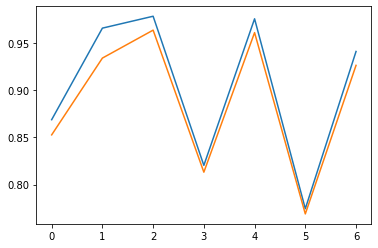

In [0]:
import matplotlib.pyplot as plt
plt.plot(comp)

**The result shows current lost function is actually make sense. Don't know why it doesn't work well**